In [1]:
%load_ext autoreload

In [2]:
%autoreload 2 

import SimpleITK as sitk
import sys
import os

import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append(r'C:\Users\matt_analysis\Documents\GitHub\caImageAnalysis')
from registration import sitkalignment

In [3]:
paths = [r'D:\Data\Imaging\2022\max_ref_images\AVG_path01_slice2c.ch2.tif',
         r'D:\Data\Imaging\2022\max_ref_images\AVG_path2_slices_-135_-145d.ch2-0005.tif']

images = [sitkalignment.load_image(p) for p in paths]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


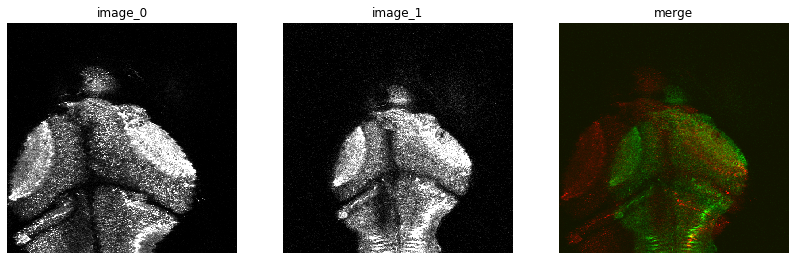

In [7]:
fig, ax = plt.subplots(1,3, figsize=(14,6))

ax[0].imshow(images[0], cmap='gray', vmax=np.percentile(images[0], 97), vmin=np.percentile(images[0], 30))
ax[1].imshow(images[1], cmap='gray', vmax=np.percentile(images[1], 97), vmin=np.percentile(images[1], 30))

[a.axis('off') for a in ax]

merge = np.zeros((images[0].shape[0], images[0].shape[1], 3)) # assumes same size images
merge[:,:,0] = 2 * images[0]/images[0].max()
merge[:,:,1] = 2 * images[1]/images[1].max()
ax[-1].imshow(merge)

[ax[n].set_title(f'image_{n}') for n in range(len(ax))]
ax[-1].set_title('merge')
plt.show()

In [4]:
%%time

save_path = r'D:\Data\Imaging\2022\max_ref_images'
registered_image = sitkalignment.register_image2(images[0], images[1], save_path)

Wall time: 2min 48s


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


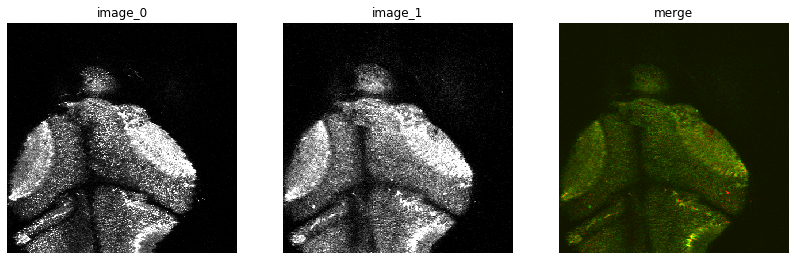

In [5]:
fig, ax = plt.subplots(1,3, figsize=(14,6))

ax[0].imshow(images[0], cmap='gray', vmax=np.percentile(images[0], 97), vmin=np.percentile(images[0], 30))
ax[1].imshow(registered_image, cmap='gray', vmax=np.percentile(registered_image, 97), vmin=np.percentile(registered_image, 30))

[a.axis('off') for a in ax]

merge = np.zeros((images[0].shape[0], images[0].shape[1], 3)) # assumes same size images
merge[:,:,0] = 2 * images[0]/images[0].max()
merge[:,:,1] = 2 * registered_image/registered_image.max()
ax[-1].imshow(merge)

[ax[n].set_title(f'image_{n}') for n in range(len(ax))]
ax[-1].set_title('merge')
plt.show()

In [6]:
%%time

mypoints = [(200, 300), (250, 100), (50, 50), (100, 27), (35, 390)]
sitkalignment.transform_points(save_path, mypoints)

Wall time: 148 ms


[(233, 275), (273, 125), (122, 90), (160, 72), (111, 343)]